In [2]:
import mylibrary.nnlib as nn

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Least squares

In [4]:
def regression(x,y):
    n = len(x)
    sy = np.sum(y)
    sx = np.sum(x)
    sx2 = np.sum(np.square(x))
    sxy = np.sum(x*y)

    # y = mx+c
    z = (n*sx2 - sx**2)
    m = (n*sxy - sx*sy)/z
    c = (sy*sx2 - sx*sxy)/z
    return m, c

def output(x, m, c):
    return m*x+c

def error(target, output):
    return np.sqrt(np.square(target-output).mean())

In [5]:
#Define a simple range of values for x and reshape so sklearn likes it.
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 0.5

In [6]:
m_t, c_t = regression(x, y)
m_t, c_t

(1.1452860020816689, 0.1483225276191405)

In [7]:
n = len(x)

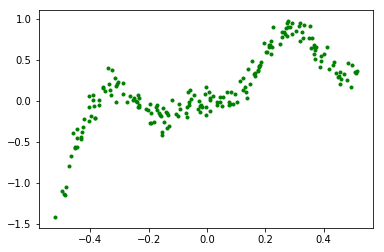

In [8]:
plt.scatter(x, y, marker='.', color='g')

In [9]:
m = np.random.exponential()*2
c = np.random.randn()
m,c

(4.004842466683343, -0.15550606807068115)

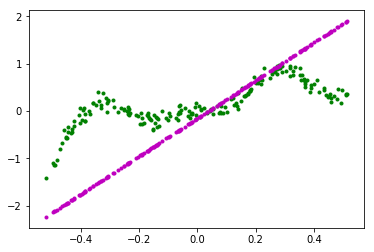

In [10]:
yhat1 = m*x+c
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, yhat1, marker='.', color='m')

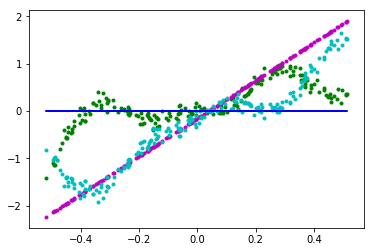

In [11]:
dy1 = yhat1-y
# dy1 = y - yhat1

plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, yhat1, marker='.', color='m')
plt.scatter(x, dy1, marker='.', color='c')
plt.plot(x,np.zeros_like(x), c='b')

-0.29979594946517485


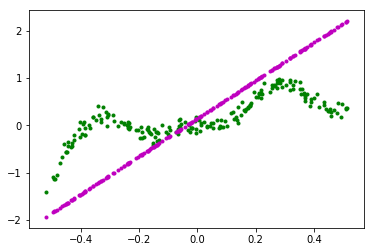

In [12]:
dc = dy1.mean()
print(dc)
yhat2 = m*x+ (c-dc)
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, yhat2, marker='.', color='m')

3.1212296069572183


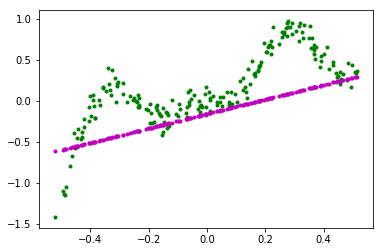

In [13]:
# modified gradient
dm = (1/x).T.dot(dy1) * 1/n
# this gives dm/dy rather than dy/dm
print(dm)
yhat2 = (m-dm)*x+c
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, yhat2, marker='.', color='m')

In [14]:
print(m_t, c_t, '\t targeted')
print(m, c, '\t initial')
print(dm, dc, '\t gradient')
print(m-dm, c-dc, '\t updated')

1.1452860020816689 0.1483225276191405 	 targeted
4.004842466683343 -0.15550606807068115 	 initial
3.1212296069572183 -0.29979594946517485 	 gradient
0.8836128597261244 0.1442898813944937 	 updated


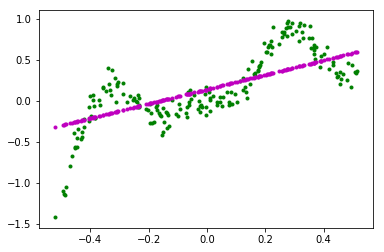

In [15]:
yhat3 = (m-dm)*x+ (c-dc)
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, yhat3, marker='.', color='m')

### Comparision

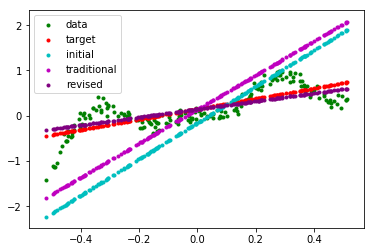

In [16]:
# this is for traditional backprop
dm_ = x.T.dot(dy1) * 1/n
ytrad = (m-dm_)*x+(c-dc)
yrev = (m-dm)*x+(c-dc)
ytarg = m_t*x+c_t

plt.scatter(x, y, marker='.', color='g', label='data')
plt.scatter(x, ytarg, marker='.', color='r', label='target')
plt.scatter(x, yhat1, marker='.', color='c', label='initial')
plt.scatter(x, ytrad, marker='.', color='m', label='traditional')
plt.scatter(x, yrev, marker='.', color='purple', label='revised')
plt.legend()

In [17]:
print(m_t, c_t, '\t targeted')
print(m, c, '\t initial')

print(dm_, dc, '\t gradient traditional')
print(dm, dc, '\t gradient revised')
print(m-dm_, c-dc, '\t updated traditional')
print(m-dm, c-dc, '\t updated revised')

1.1452860020816689 0.1483225276191405 	 targeted
4.004842466683343 -0.15550606807068115 	 initial
0.24110900996014614 -0.29979594946517485 	 gradient traditional
3.1212296069572183 -0.29979594946517485 	 gradient revised
3.7637334567231964 0.1442898813944937 	 updated traditional
0.8836128597261244 0.1442898813944937 	 updated revised


## For non zero centered data

In [18]:
#Define a simple range of values for x and reshape so sklearn likes it.
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x + 0.5

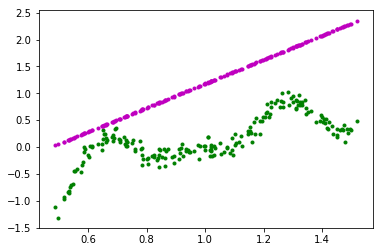

In [19]:
m_t, c_t = regression(x, y)
n = len(x)

m = np.random.exponential()*2
c = np.random.randn()

yhat1 = m*x+c
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, yhat1, marker='.', color='m')

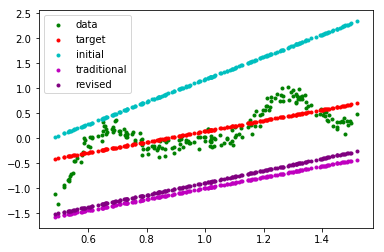

In [20]:
dy1 = yhat1-y

dc = dy1.mean()
dm = (1/x).T.dot(dy1) * 1/n
dm_ = x.T.dot(dy1) * 1/n

ytrad = (m-dm_)*x+(c-dc)
yrev = (m-dm)*x+(c-dc)
ytarg = m_t*x+c_t

plt.scatter(x, y, marker='.', color='g', label='data')
plt.scatter(x, ytarg, marker='.', color='r', label='target')
plt.scatter(x, yhat1, marker='.', color='c', label='initial')
plt.scatter(x, ytrad, marker='.', color='m', label='traditional')
plt.scatter(x, yrev, marker='.', color='purple', label='revised')
plt.legend()